In [1]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import matplotlib.pylab as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
# simpleNet
from common.functions import *
from common.gradient import numerical_gradient

# NNT
Data -> Humans' Effort(SIFT,HOG,..) -> **MachineTraining(SVM,KNN,..)** -> Output\
Data -> **Neural Network(Deep Learning)** -> Output\

Deep Learning need _training data_ , _test data_

## Standard index
### lose function(cost function)
MSE (Mean Squared Error)

$
E = \displaystyle\frac{1}{2}\sum_{k}(y_k-t_k)^2
$

$y_k$ Output of NN\
$t_k$ Answer label\
$k$ Dimension of Data

In [2]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [3]:
# If num 
# t: answer is `2`
t = [0,0,1,0,0,0,0,0]
# y: estimate `2` is answer (0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

# y: estimate `7` is answer (0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

0.09250000000000003
0.5925


CEE (Cross Entropy Error)

$
E = -\displaystyle\sum_{k}t_k\log{y_k}
$

$y_k$ Output of NN\
$t_k$ Answer label (One-hot encoding)\
$k$ Dimension of Data

In [4]:
def cross_entropy_error(y,t):
    # use delta cause log0 = -inf
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [5]:
# t: answer is `2`
t = [0,0,1,0,0,0,0,0]
# y: estimate `2` is answer (0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

# y: estimate `7` is answer (0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


### Minibatch Learning

Due to ineffciency in checking all lost functions, it's recommended to randomly choose some ipt data, and  calculate lose functions of them.

$
E = \displaystyle-\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log{y_{nk}}
$



In [6]:
(x_train,t_train), (x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size) # 0<{NUM}<train_size, len({NUM})=batch_size
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
# CEE (for batch)
def cross_entropy_errorB(y,t):
    # y: NN opt, t: one-hot-label
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [8]:
# batch CEE when t isn't one-hot-encoded
def cross_entropy_errorB_nonOneHot(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [9]:
testTemp = np.arange(0,20)
# testTemp.ndim == 1
testTemp = testTemp.reshape(2,10)
testTemp.ndim

2

### Calculus

reason why we use lost functions is to fit error with calculus.\
when we use formal stair-shape function, slope will be either 0 or inf.

In [10]:
def numerical_diff(f,x):
    h = 1e-4 # known to fit well
    return (f(x+h)-f(x-h))/(2*h)

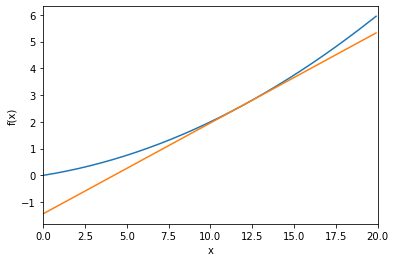

In [11]:
def fn_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0,20.0,0.1)
y = fn_1(x)

plt.xlim(0,20)
plt.xlabel("x"); plt.ylabel("f(x)")
plt.plot(x,y)
plt.plot(x,numerical_diff(fn_1,12)*(x-12)+fn_1(12)) 
plt.show()

**Gradient**

$
\displaystyle(\frac{\partial{f}}{x_0},\frac{\partial{f}}{x_1},\dots)
$

In [12]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [13]:
x = np.array([2,4])
np.sum(x**2)

20

In [14]:
def numerical_gradient_base(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # has same shape as x
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val+h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val # restore value
    return grad

def numerical_gradient(f,x):
    if x.ndim == 1:
        return numerical_gradient_base(f,x)
    else:
        grad = np.zeros_like(x)
        
        for idx, val in enumerate(x):
            grad[idx] = numerical_gradient_base(f,val)
        return grad   

In [15]:
# function_2 = x^2 + y^2
numerical_gradient(function_2,np.array([3.,4.]))

array([6., 8.])

In [16]:
f = function_2
x = np.array([3.,4.])

h = 1e-4
grad = np.zeros_like(x)
i = 1

tmp_val = x[i]
x[i] = tmp_val+h
fxh1 = f(x)
x[i] = tmp_val-h
fxh2 = f(x)
grad[i] = (fxh1-fxh2) / (2*h)
grad

array([0., 8.])

No handles with labels found to put in legend.


2


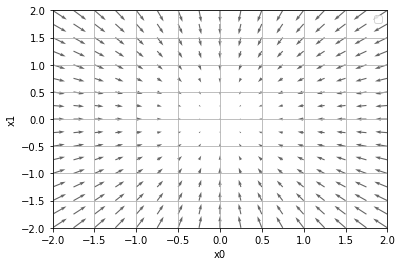

In [17]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)


X = X.flatten()
Y = Y.flatten()

print(np.array([X,Y]).ndim)
   
grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

## Gradient descend

follow gradient direction where slop decreasing to found saddle point(slope is 0).\
algorithm to find minimum point.

$
\displaystyle
x_0 = x_0 - \eta\frac{\partial f}{\partial x_0}\\
\displaystyle
x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}
$

$\eta$ means quantity that renew.\
In NNL, also called **_learning rate_** 

In [18]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

#### Q. found minimum val of $f(x_0,x_1)=x_0^2+x_1^2$

In [19]:
def fn2(x):
    return x[0]**2+x[1]**2

In [20]:
gradient_descent(fn2,np.array([3.,4.]),lr=0.1,step_num=100)

array([6.11110793e-10, 8.14814391e-10])

In [21]:
def gradient_descent_history(f,init_x,lr=0.01,step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x, np.array(x_history)

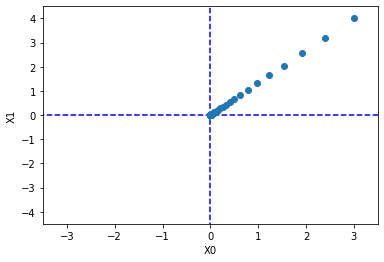

In [22]:
x,x_history = gradient_descent_history(fn2,np.array([3.,4.]),lr=0.1,step_num=100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

Text(0.5, 1.0, 'Simplest default with labels')

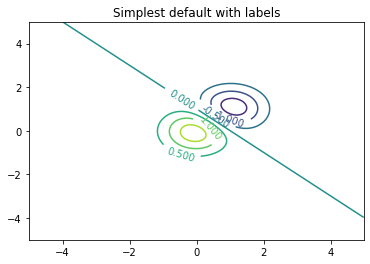

In [23]:
delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

Text(0.5, 1.0, 'Simplest default with labels')

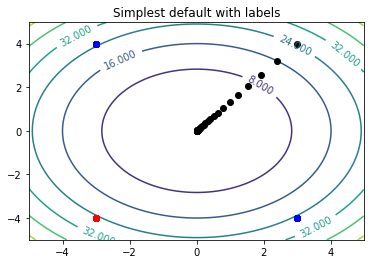

In [24]:
delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2+Y**2

m,m_history = gradient_descent_history(fn2,np.array([3.,4.]),lr=0.1,step_num=100)

# Too large learning rate
m2,m2_history = gradient_descent_history(fn2,np.array([-3.,4.]),lr=1.,step_num=100)
# Too small learning rate
m3,m3_history = gradient_descent_history(fn2,np.array([-3.,-4.]),lr=1e-10,step_num=100)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.plot(m_history[:,0], m_history[:,1], 'ok')
ax.plot(m2_history[:,0], m2_history[:,1], 'ob')
ax.plot(m3_history[:,0], m3_history[:,1], 'or')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

### Slope in NN

if shape is $2\times3$, weight is $W$, loss function is $L$,\
_slope_ is $\displaystyle\frac{\partial L}{\partial W}$


> parameter like _learning rate_ is called **_hyper parameter_**.\
These parameters have to set manually.


$
W = 
    \begin{pmatrix}
        w_{11} & w_{12} & w_{13} \\
        w_{21} & w_{22} & w_{23} 
    \end{pmatrix}\\
\frac{\partial L}{\partial W} =
    \begin{pmatrix}
        \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
        \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
    \end{pmatrix}
$

In [25]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # Normal distribution
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    # x is imput data, t is answer label
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [26]:
net = simpleNet()
print(net.W)

x = np.array([.6,.9])
p = net.predict(x)
print(p)

# index of max val
print(np.argmax(p))

# answer label(one-hot)
t = np.array([0,0,1])
print(net.loss(x,t))

[[-0.91097825 -0.11733601  1.64943251]
 [ 0.68649556 -1.86055149  0.51183733]]
[ 0.07125906 -1.74489795  1.4503131 ]
2
0.2567905761369811


In [27]:
# slope

# W is dummy value
f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.11687264  0.01900929 -0.13588193]
 [ 0.17530896  0.02851393 -0.20382289]]


## Embody learning algorithm

1st - embody mini batch\
2nd - find slope of each weight's args to decrease loss function's val\
3rd - renew arg to slope direction\
4th - repeat

### Stochastic Gradient Decent(SGD)

gradient descend method in randomly be chosen data

In [28]:
test = {}
test['a'] = 3
test

{'a': 3}

In [2]:
class TwoLayerNet:
    #                  ipt neuron, hid neuron , opt neuron
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # Define dictionary
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(a2)
        return y
    
    # x: ipt data, t: ans label
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        # shape: (ipt_row_size, output_size)
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy
    
    # x: ipt data, t: ans label
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [30]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [42]:
# Example run

# dummy data
x = np.random.rand(100,784)
# dummy ans label
t = np.random.rand(100,10)

# slope
grads = net.numerical_gradient(x, t)

y = net.predict(x)

grads['W1'].shape # (784,100)
y.shape # (100,10)
net.accuracy(x, t)

0.06

In [41]:
testA = np.array([0,0,0,1])
testB = np.array([0,1,0,1])
# print Boolean np.array (True == 1, False == 0)
np.sum(testA == testB) # 3
testA == testB

array([ True, False,  True,  True])

### Embody mini-batch learning

In [46]:
(x_train,t_train), (x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

train_loss_list = []

# Hyperparameter
iters_num = 10000 # repeat num
train_size = x_train.shape[0]
batch_size = 100 # mini-batch size
learning_rate = 0.1
network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    # get mini-batch
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # cal slope
    grad = network.gradient(x_batch,t_batch)
    
    # renew params
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # record
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

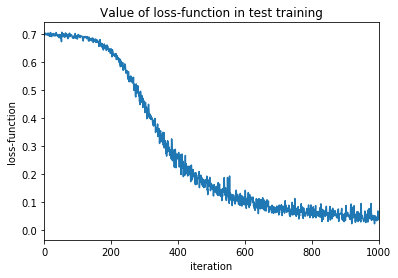

In [63]:
x = np.arange(0,10000)
y = np.array(train_loss_list)

# fig, ax = plt.subplots()
plt.plot(x,y)
plt.xlim(0,1000)
plt.xlabel("iteration")
plt.ylabel("loss-function")
plt.title("Value of loss-function in test training")
plt.show()

### Evaluate with test data

check _overfitting_

> 1 `epoch` is unit when exhausting total training data cycle.\
When processing 1000 datas with 20 mini-batches, we need 50 process to exhaust all data. In this case, 1 epoch == 50 process

we'll check accuracy and training data in every epoch

In [10]:
np.random.choice(10, 7)

array([9, 3, 3, 5, 5, 9, 1])

In [14]:
(x_train,t_train), (x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# Hyperparams
iters_num = int(10e+3)
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# repeat rate per epoch
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # acquire minibatch
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # cal slope
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # record
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # cal accuracy per epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

Train acc, test acc | 0.10441666666666667, 0.1028
Train acc, test acc | 0.8032833333333333, 0.8067
Train acc, test acc | 0.8763, 0.8824
Train acc, test acc | 0.8968333333333334, 0.9004
Train acc, test acc | 0.9079666666666667, 0.9109
Train acc, test acc | 0.9148166666666666, 0.9163
Train acc, test acc | 0.9198333333333333, 0.9228
Train acc, test acc | 0.92565, 0.9258
Train acc, test acc | 0.9293666666666667, 0.9299
Train acc, test acc | 0.93225, 0.9333
Train acc, test acc | 0.93545, 0.9356
Train acc, test acc | 0.9368333333333333, 0.9368
Train acc, test acc | 0.9401166666666667, 0.9402
Train acc, test acc | 0.9425666666666667, 0.9408
Train acc, test acc | 0.9443166666666667, 0.9436
Train acc, test acc | 0.9457333333333333, 0.9452
Train acc, test acc | 0.9469666666666666, 0.9459


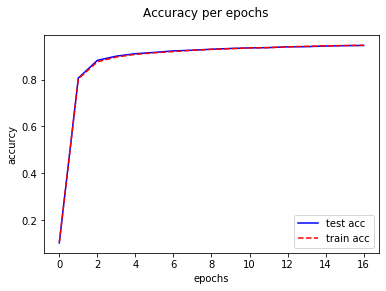

In [46]:
x = np.arange(0,17,1)

fig, ax = plt.subplots()
fig.suptitle("Accuracy per epochs")

ax.plot(x, test_acc_list, '-b', x, train_acc_list, '--r')
ax.set_xlabel("epochs")
ax.set_ylabel("accurcy")
ax.legend(("test acc","train acc"))

plt.show()

# test acc ~= train acc.
# so no overfitting is occured

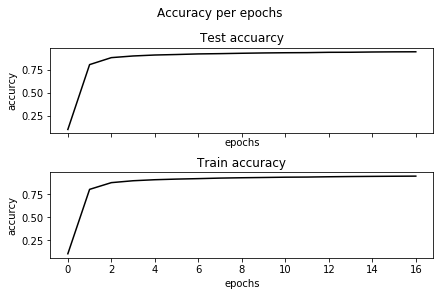

In [52]:
# ver2
x = np.arange(0,17,1)

fig, ax = plt.subplots(2, sharex=True, sharey=True, constrained_layout=True)
fig.suptitle("Accuracy per epochs")

ax[0].plot(x, test_acc_list, '-k')
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("accurcy")
ax[0].set_title("Test accuarcy")

ax[1].plot(x, train_acc_list, '-k')
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accurcy")
ax[1].set_title("Train accuracy")

plt.show()